# Big Data & BI – Optional Intro Notebook

**Topic:** Data, EDA


## Learning Objectives
By the end, you can:
- Download a real dataset from the open source projects.
- Evaluate a list of **KPIs**.
- Run simple analysis.


- Open "https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GTNEJD"
- Download peoplesun_hh_anon.tab as csv (comma seperated valaues).
- Files named peoplesun_hh_odk_codebook.xlsx and peoplesun_hh_odk_choices.xlsx are also needed to decode the questions and answers.
- Place it in your data folder

## Key Performance Indicators (KPIs)

### KPI 1 — Electrification Rate (%)
**Definition:** Percentage of households with any access to electricity (grid or off-grid like solar/generator).  
**Formula:** Electrification Rate = (Households_with_electricity / Total_households) * 100  
**Purpose:** Measures extent of access.

---

### KPI 2 — Supply Reliability (Outages or Hours Without Power)
**Definition:** Average number of power outages per week OR hours without power per day among connected households.  
**Formula (example):** Avg_outages_per_week = SUM(outages_per_week) / N_connected_households  
**Purpose:** Captures quality/stability of supply.

---

### KPI 3 — Energy Burden (%)
**Definition:** Average share of monthly household spending (or income) devoted to electricity expenses.  
**Formula:** Energy_Burden = (Electricity_expenditure / Total_expenditure_or_income) * 100  
**Purpose:** Assesses affordability.


## 1) Setup & load

In [2]:
# --- setup ---
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt

DATA_PATH = Path(r"C:\Users\ABHISHEK\Desktop\Big data & Business Intelligence\data\peoplesun_hh_anon.csv")  # students: place file here

# Helpful options
pd.set_option("display.max_colwidth", 120)
pd.set_option("display.max_columns", 120)

# --- load ---
# If the CSV has a different delimiter, change sep="," accordingly.
df = pd.read_csv(DATA_PATH, sep=",", low_memory=False)

print("Rows:", len(df))
df.head()


Rows: 3599


,zone,state,eaid,lga,urca_cat,hhid,q102,q103,q104,q105,q106,q107,q108,q109,q110,q201,q202,q203_1,q203_2,q203_3,q203_4,q204,q205,q206,q207_1,q207_2,q207_3,q208,q209,q210,q210_1,q211,q211__1,q211__2,q211__3,q211__4,q211__5,q211__6,q211__7,q211__8,q211__9,q211__10,q211__11,q211__12,q211__0,q211__96,q211_1,q212,q212_1,q213,q213_1,q213_1__1,q213_1__2,q213_1__96,q214,q214__1,q214__2,q214__3,q214__4,q214__5,...,q402__4,q402__5,q402__6,q404,q404__1,q404__2,q404__3,q404__4,q404__5,q404__6,q404__7,q404__8,q404__9,q404__10,q404__11,q404__0,q404__96,q404_1,q405,q405_1,q405_1__1,q405_1__2,q405_1__3,q405_1__4,q405_1__5,q405_1__6,q405_1__7,q405_1__8,q405_1__9,q405_1__10,q405_1__11,q405_1__12,q405_1__13,q405_1__96,q405_2,q501,q501__1,q501__2,q501__3,q501__4,q501__5,q501__96,q503,q503__1,q503__2,q503__3,q503__4,q503__5,q503__6,q503__99,q503__96,q503__98,q503_1,q604_1,q604_2,q604_3,q604_4,q604_5,q604_6,natweight
0,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,d8af8ab5-30ab-4d9f-bfe4-81231dbe5dbf,1,NaN,1,1,36,2,NaN,NaN,NaN,5,4,13,4,1,0,2,8,6,0,2,0,22,14,96,Politics,2 96,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Politics and farming for consumption,1,1.0,1,1,1.0,0.0,0.0,1 11,1,0,0,0,0,...,1,0,1,2 11,0,1,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,4,2,3,2,3,3,0.039141
1,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,e8245d5c-8130-4e78-b4b0-1053b7ecbc9b,1,NaN,1,1,60,2,NaN,NaN,NaN,6,2,4,3,2,1,3,9,6,0,0,0,14,13,1,NaN,1 3 96,1,0,1,0,0,0,0,0,0,0,0,0,0,1,Farming for consumption,0,NaN,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,4,2,3,1,3,3,0.039141
2,North West,Kano,KN_104,garun_malam,<1hr to large city,435c8e27-517a-46b9-af04-48830e086d7a,1,NaN,1,1,45,1,NaN,NaN,NaN,3,6,3,2,1,0,1,5,6,1,1,0,14,8,2,NaN,2 8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1,1.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,11,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,NaN,4,3,4,2,4,1,0.109779
3,North West,Kano,KN_104,garun_malam,<1hr to large city,9303fa53-9fd2-41a9-9f0d-9567dbe5168e,1,NaN,1,1,47,1,NaN,NaN,NaN,3,15,7,2,1,0,1,10,6,3,1,0,14,8,2,NaN,2 7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1,1.0,0,NaN,NaN,NaN,NaN,11,0,0,0,0,0,...,1,1,1,2 11 1,1,1,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,NaN,4,3,4,3,4,2,0.109779
4,North West,Kano,KN_104,garun_malam,<1hr to large city,c62cc5a5-29c5-423b-9543-a7b05bda454b,1,NaN,1,1,45,1,NaN,NaN,NaN,2,1,4,1,1,0,2,3,6,0,1,0,24,24,2,NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,11,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,NaN,4,2,4,2,4,2,0.109779


## 2) Quick EDA (Exploratory Data Analysis)

In [3]:
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Columns: 293 entries, zone to natweight
dtypes: float64(105), int64(158), object(30)
memory usage: 8.0+ MB


zone         0
state        0
eaid         0
lga          0
urca_cat     0
            ..
q604_3       0
q604_4       0
q604_5       0
q604_6       0
natweight    0
Length: 293, dtype: int64

## Relevant columns

In [4]:
cols = ['q301','q302','q307_3','q307_4','q307_5','q307_10','q309','q210']
data = df[[c for c in cols if c in df.columns]].copy()

decoded_labels = {
    'q301': 'Primary source of electricity',
    'q302': 'Hours of electricity available per day (or typical source strength)',
    'q307_3': 'Uses solar home system',
    'q307_4': 'Uses diesel/petrol generator',
    'q307_5': 'Uses battery/inverter backup',
    'q307_10': 'Other specified electricity source',
    'q309': 'Monthly electricity/energy expenditure',
    'q210': 'Monthly household income'
}

print("Decoded Labels:")
for k, v in decoded_labels.items():
    print(f"{k} -> {v}")

Decoded Labels:
q301 -> Primary source of electricity
q302 -> Hours of electricity available per day (or typical source strength)
q307_3 -> Uses solar home system
q307_4 -> Uses diesel/petrol generator
q307_5 -> Uses battery/inverter backup
q307_10 -> Other specified electricity source
q309 -> Monthly electricity/energy expenditure
q210 -> Monthly household income


## 3) KPI 1 — Electrification Rate (%)

In [5]:
data['has_electricity'] = data[['q301','q302']].notna().any(axis=1)
kpi1 = data['has_electricity'].mean() * 100
print("=== KPI 1 — Electrification Rate (%) ===")
print(kpi1)

=== KPI 1 — Electrification Rate (%) ===
100.0


## 4) KPI 2 — Reliability (choose the best available)

In [6]:
kpi2_hours = data['q307_3'].mean() if 'q307_3' in data else None
kpi2_outages = data['q307_4'].mean() if 'q307_4' in data else None
print("\n=== KPI 2 — Reliability ===")
print("Avg Hours Without Power:", kpi2_hours)
print("Avg Outages Per Week:", kpi2_outages)


=== KPI 2 — Reliability ===
Avg Hours Without Power: 6.349517490952955
Avg Outages Per Week: 4.83956574185766


## 5) KPI 3 — Energy Burden (% of total monthly expenditure or income)

In [7]:
data['spend_share'] = None
if 'q307_10' in data and 'q210' in data:
    data['zero_income_flag'] = data['q210'] == 0
    data.loc[data['q210'] != 0, 'spend_share'] = data['q307_10'] / data['q210']
    kpi3 = data['spend_share'].mean()
else:
    kpi3 = None
print("\n=== KPI 3 — Energy Burden (% income) ===")
print(kpi3, " (excluding zero-income in calculation)")
print("Zero-income households flagged separately:", data['zero_income_flag'].sum() if 'zero_income_flag' in data else 0)


=== KPI 3 — Energy Burden (% income) ===
1166.7847134139015  (excluding zero-income in calculation)
Zero-income households flagged separately: 16


## Visualization of KPIs

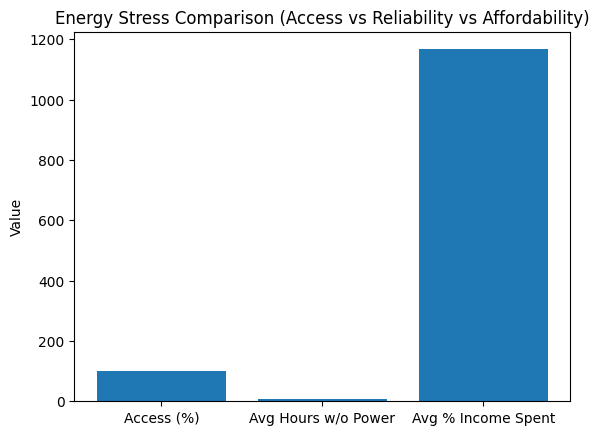

In [8]:


# Visualization
kpis = ['Access (%)', 'Avg Hours w/o Power', 'Avg % Income Spent']
values = [kpi1, kpi2_hours, kpi3]

plt.figure()
plt.bar(kpis, values)
plt.title("Energy Stress Comparison (Access vs Reliability vs Affordability)")
plt.ylabel("Value")
plt.show()